In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
transform = transforms . Compose ([ transforms . ToTensor () ,
transforms . Normalize ((0.5 , ) ,
(0.5 ,) ) ])
trainset = datasets . FashionMNIST ( ' ~/. pytorch / F_MNIST_data / ' ,
download = True , train = True , transform = transform )
trainloader = torch . utils . data . DataLoader ( trainset , batch_size
=32 , shuffle = True )
testset = datasets . FashionMNIST ( ' ~/. pytorch / F_MNIST_data / ' ,
download = True , train = False , transform = transform )
testloader = torch . utils . data . DataLoader ( testset , batch_size =32 ,
shuffle = False )

100%|██████████| 26421880/26421880 [00:03<00:00, 8641520.30it/s]


Extracting  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw/train-images-idx3-ubyte.gz to  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 2996439.04it/s]


Extracting  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw/train-labels-idx1-ubyte.gz to  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6710191.42it/s]


Extracting  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw/t10k-images-idx3-ubyte.gz to  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15601356.21it/s]

Extracting  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw



In [4]:
batch = next ( iter ( trainloader ) )
print ( batch [0]. shape , batch [1]. shape )

torch.Size([32, 1, 28, 28]) torch.Size([32])


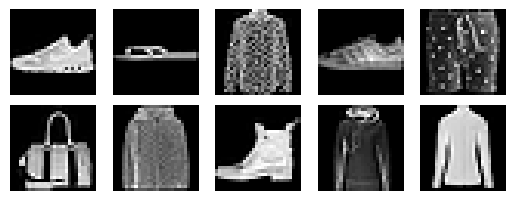

In [7]:
import matplotlib . pyplot as plt
f , ax = plt . subplots (2 , 5)
plt . subplots_adjust ( bottom =0.3 , top =0.7 , hspace =0)
for i in range (2) :
    for j in range (5) :
        image , label = next ( iter ( trainloader ) )
        ax [ i ][ j ]. set_axis_off ()
        ax [ i ][ j ]. imshow ( image [0 ,0 ,:] , cmap = 'gray')

# Flattening is done in the def train_model using images.view(images.size(0), -1)

In [52]:
# Define the model building function
def build_model(input_size, hidden_layers, output_size, activation_fn):
    layers = [nn.Linear(input_size, hidden_layers[0]), activation_fn()]
    for i in range(1, len(hidden_layers)):
        layers.append(nn.Linear(hidden_layers[i-1], hidden_layers[i]))
        layers.append(activation_fn())
        layers.append(nn.Dropout(0.2))
    layers.append(nn.Linear(hidden_layers[-1], output_size))
    return nn.Sequential(*layers)

def train_model(model, trainloader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        total = 0
        correct = 0
        for images, labels in trainloader:
            images = images.view(images.size(0), -1) # This flattens the image
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Calculate training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    training_accuracy = correct / total
    return training_accuracy

# Evaluation function
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total


In [53]:
# Experiment configurations
network_structures = [[32], [64], [128], [32, 16], [64, 32, 16]]
input_size = 28*28  # 784 input features
output_size = 10    # 10 classes
num_epochs = 30     # Reduced for quicker experimentation

results = []

# Experiment with different network structures
for structure in network_structures:
    model = build_model(input_size, structure, output_size, nn.ReLU)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    training_accuracy = train_model(model, trainloader, criterion, optimizer, num_epochs)
    test_accuracy = evaluate_model(model, testloader)
    results.append({
        'structure': structure, 
        'activation_function': 'ReLU', 
        'training_accuracy': training_accuracy, 
        'test_accuracy': test_accuracy
    })

# Find the best performing structure
best_structure = max(results, key=lambda x: x['test_accuracy'])['structure']
print(best_structure)

activation_functions = [nn.Sigmoid, nn.ELU, nn.LeakyReLU]

# Experiment with different activation functions on the best performing structure
for activation_fn in activation_functions:
    model = build_model(input_size, best_structure, output_size, activation_fn)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    training_accuracy = train_model(model, trainloader, criterion, optimizer, num_epochs)
    test_accuracy = evaluate_model(model, testloader)
    results.append({
        'structure': best_structure, 
        'activation_function': activation_fn.__name__, 
        'training_accuracy': training_accuracy, 
        'test_accuracy': test_accuracy
    })

# Print the results
for result in results:
    print(f"Structure: {result['structure']}, "
          f"Activation Function: {result['activation_function']}, "
          f"Training Accuracy: {result['training_accuracy']:.2f}%, "
          f"Testing Accuracy: {result['test_accuracy']:.2f}%")

# Summarize insights here

[128]
Structure: [32], Activation Function: ReLU, Training Accuracy: 0.90%, Testing Accuracy: 0.87%
Structure: [64], Activation Function: ReLU, Training Accuracy: 0.91%, Testing Accuracy: 0.88%
Structure: [128], Activation Function: ReLU, Training Accuracy: 0.92%, Testing Accuracy: 0.88%
Structure: [32, 16], Activation Function: ReLU, Training Accuracy: 0.87%, Testing Accuracy: 0.86%
Structure: [64, 32, 16], Activation Function: ReLU, Training Accuracy: 0.87%, Testing Accuracy: 0.87%
Structure: [128], Activation Function: Sigmoid, Training Accuracy: 0.88%, Testing Accuracy: 0.86%
Structure: [128], Activation Function: ELU, Training Accuracy: 0.90%, Testing Accuracy: 0.88%
Structure: [128], Activation Function: LeakyReLU, Training Accuracy: 0.92%, Testing Accuracy: 0.88%


In [54]:
def init_weights(m):
    if (type(m) == nn.Linear or type(m) == nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

def accuracy(y_hat, y):
    """Compute the number of correct predictions"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

def init_weights(m):
    if isinstance(m, (nn.Linear, nn.Conv2d)):
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

# Define the CNN architecture
class BaselineCNN(nn.Module):
    def __init__(self):
        super(BaselineCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)  # (a)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # (b)
        self.flatten = nn.Flatten()  # (c)
        self.fc1 = nn.Linear(32 * 13 * 13, 100)  # (d)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 10)  # (e)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Convolutional layer and MaxPool
        x = self.flatten(x)  # FlattenI just 
        x = self.relu(self.fc1(x))  # Dense layer with ReLU
        x = self.fc2(x)  # Output layer
        return x

# Instantiate the model
model = BaselineCNN()
model.apply(init_weights)

# Set up optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # SGD with specified parameters
loss = nn.CrossEntropyLoss()

# Print the shape of the output at each layer
X = torch.ones((1, 1, 28, 28))
for layer in model.children():
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)
    
# Count of trainable parameters
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Number of trainable parameters:", trainable_params)


Conv2d output shape:	 torch.Size([1, 32, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 32, 13, 13])
Flatten output shape:	 torch.Size([1, 5408])
Linear output shape:	 torch.Size([1, 100])
ReLU output shape:	 torch.Size([1, 100])
Linear output shape:	 torch.Size([1, 10])
Number of trainable parameters: 542230


In [56]:
def train_and_evaluate(model, trainloader, testloader, optimizer, loss_fn, num_epochs):
    train_accuracy, test_accuracy = [], []
    for epoch in range(num_epochs):
        model.train()
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        # Calculate training accuracy
        train_correct = 0
        train_total = 0
        with torch.no_grad():
            for images, labels in trainloader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                train_total += labels.size(0)
                train_correct += (predicted == labels).sum().item()
        train_accuracy.append(100 * train_correct / train_total)

        # Calculate testing accuracy
        test_correct = 0
        test_total = 0
        with torch.no_grad():
            for images, labels in testloader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                test_total += labels.size(0)
                test_correct += (predicted == labels).sum().item()
        test_accuracy.append(100 * test_correct / test_total)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Accuracy: {train_accuracy[-1]:.2f}%, Test Accuracy: {test_accuracy[-1]:.2f}%')

    return train_accuracy, test_accuracy


In [63]:
class ModifiedCNN(nn.Module):
    def __init__(self):
        super(ModifiedCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)  # (a)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # (b)
        self.flatten = nn.Flatten()  # (c)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(32 * 13 * 13, 100)  # (d)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 10)  # (e)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate and train the modified model
model_with_correct_dropout = ModifiedCNN()
model_with_correct_dropout.apply(init_weights)

optimizer = optim.SGD(model_with_correct_dropout.parameters(), lr=0.01, momentum=0.9)
train_acc_dropout, test_acc_dropout = train_and_evaluate(model_with_correct_dropout, trainloader, testloader, optimizer, loss, num_epochs=50)

Epoch 1/50, Train Accuracy: 88.31%, Test Accuracy: 87.20%
Epoch 2/50, Train Accuracy: 90.61%, Test Accuracy: 89.00%
Epoch 3/50, Train Accuracy: 91.59%, Test Accuracy: 89.88%
Epoch 4/50, Train Accuracy: 91.09%, Test Accuracy: 88.89%
Epoch 5/50, Train Accuracy: 92.49%, Test Accuracy: 90.08%
Epoch 6/50, Train Accuracy: 93.26%, Test Accuracy: 90.62%
Epoch 7/50, Train Accuracy: 93.66%, Test Accuracy: 90.53%
Epoch 8/50, Train Accuracy: 94.05%, Test Accuracy: 90.77%
Epoch 9/50, Train Accuracy: 94.64%, Test Accuracy: 91.26%
Epoch 10/50, Train Accuracy: 94.64%, Test Accuracy: 90.93%
Epoch 11/50, Train Accuracy: 94.75%, Test Accuracy: 90.61%
Epoch 12/50, Train Accuracy: 95.34%, Test Accuracy: 91.39%
Epoch 13/50, Train Accuracy: 95.20%, Test Accuracy: 90.89%
Epoch 14/50, Train Accuracy: 95.15%, Test Accuracy: 90.87%
Epoch 15/50, Train Accuracy: 96.05%, Test Accuracy: 91.45%
Epoch 16/50, Train Accuracy: 95.85%, Test Accuracy: 91.16%
Epoch 17/50, Train Accuracy: 95.87%, Test Accuracy: 90.88%
Epoch 

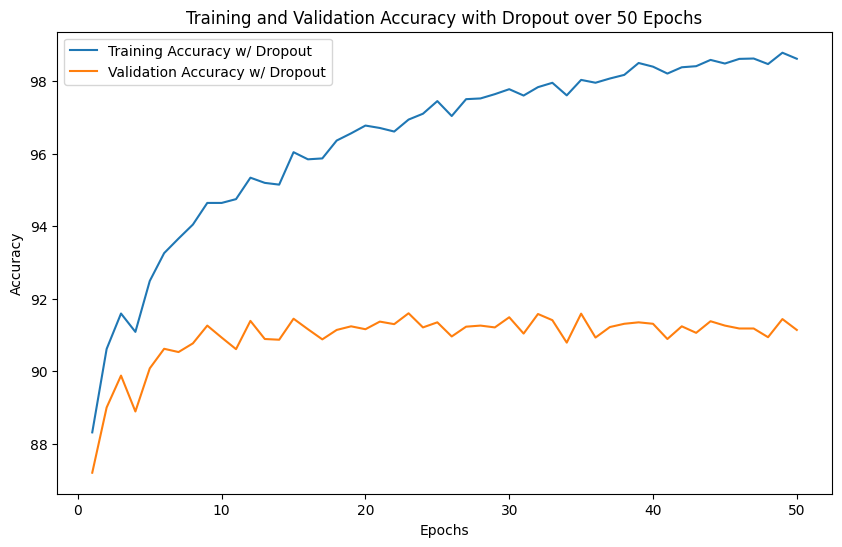

In [64]:
# # Train and Evaluate with Dropout
# optimizer = optim.SGD(model.parameters(), lr=0.1)
# train_acc_dropout, test_acc_dropout = train_and_evaluate(model, trainloader, testloader, optimizer, loss, num_epochs=50)

# Plotting Training and Validation Accuracy with Dropout
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_acc_dropout, label='Training Accuracy w/ Dropout')
plt.plot(range(1, 51), test_acc_dropout, label='Validation Accuracy w/ Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy with Dropout over 50 Epochs')
plt.legend()
plt.show()


In [68]:
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)  # Original Convolutional layer
        self.pool1 = nn.MaxPool2d(2, 2)   # Original Maxpooling layer
        self.conv2 = nn.Conv2d(32, 64, 3) # Additional Convolutional layer with 64 filters
        self.pool2 = nn.MaxPool2d(2, 2)   # Additional Maxpooling layer
        self.flatten = nn.Flatten()       # Flatten layer
        self.dropout = nn.Dropout(0.5)    # Dropout layer
        # Adjusted dense layer considering the output of the last maxpooling layer
        self.fc1 = nn.Linear(64 * 5 * 5, 100) # Adjusted Dense layer
        self.relu = nn.ReLU()                  # ReLU activation
        self.fc2 = nn.Linear(100, 10)          # Output layer

    def forward(self, x):
        x = self.pool1(self.relu(self.conv1(x)))
        x = self.pool2(self.relu(self.conv2(x)))
        x = self.flatten(x)
        x = self.dropout(x)  # Apply dropout here
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the enhanced model
enhanced_model = EnhancedCNN()
enhanced_model.apply(init_weights)

# # Training and Evaluating with Additional Convolution and MaxPooling Layer
optimizer = optim.SGD(enhanced_model.parameters(), lr=0.01)
train_acc_enhanced, test_acc_enhanced = train_and_evaluate(enhanced_model, trainloader, testloader, optimizer, loss, num_epochs=10)

print(f"Enhanced CNN with Additional Layers and Dropout - Test Accuracy: {test_acc_enhanced[-1]:.2f}%")

In [ ]:
# Learning Rate 0.001
optimizer = optim.SGD(model.parameters(), lr=0.001)
train_acc_lr001, test_acc_lr001 = train_and_evaluate(model, trainloader, testloader, optimizer, loss, num_epochs=10)
print(f"Learning Rate 0.001 - Test Accuracy: {test_acc_lr001[-1]:.2f}%")

# Learning Rate 0.1
optimizer = optim.SGD(model.parameters(), lr=0.1)
train_acc_lr01, test_acc_lr01 = train_and_evaluate(model, trainloader, testloader, optimizer, loss, num_epochs=10)
print(f"Learning Rate 0.1 - Test Accuracy: {test_acc_lr01[-1]:.2f}%")


IMPLEMENTATION Following the implementation in class, create a baseline CNN that is specified
by the following:

(a) A single convolutional layer with 3 x 3 sized window for computing the convolution, with 32 filters

(b) Maxpooling layer with 2 x 2 window size.

(c) Flatten resulting features to reshape your output appropriately.

(d) Dense layer on top of this (100 neurons) with ReLU activation

(e) Dense layer with 10 neurons for calculating softmax output (Our classification result will out-put one of the ten possible classes, corresponding to our digits)
